# Расчетно-графическая работа. Технологии AI и ML
### Описание работы
**Цель работы:** практическое освоение современных технологий искусственного интеллекта и машинного обучения через реализацию одного из проектов по ключевым направлениям AI/ML.

**Задачи работы:** 
* Изучить теоретические основы выбранного направления AI/ML
* Освоить инструменты и библиотеки для реализации проекта
* Разработать и протестировать программное решение
* Провести анализ эффективности выбранного метода
* Сформулировать выводы о применимости технологии

**Практический результат:** работающая программа или система, решающая конкретную задачу в выбранной предметной области с использованием технологий искусственного интеллекта и машинного обучения.

**Направление:** Распознавание и анализ лиц (Face Recognition).

**Вариант 55. Оценка эмоций по лицу.**
## Ход работы:
### Шаг 1. Аналитический раздел
Распознавание эмоций по лицу является одной из прикладных задач компьютерного зрения, направленной на автоматическое определение эмоционального состояния человека на основе анализа его мимики. Подобные системы находят применение в человеческо-компьютерном взаимодействии, образовании, маркетинге, безопасности и многих других областях, где важно адаптировать поведение системы под эмоциональное состояние пользователя.

Несмотря на видимую простоту для человека, автоматическая классификация эмоций представляет собой сложную инженерную задачу. Она включает детекцию лица, выделение его области, нормализацию изображения, извлечение информативных признаков и построение классификационной модели. Современные методы основываются на глубоких сверточных нейронных сетях, поскольку такие архитектуры позволяют эффективно извлекать пространственные и текстурные особенности, отражающие мимику.

**Цель работы** - разработать и исследовать систему автоматической классификации эмоций человека по изображению лица.

Для достижения цели решаются следующие **задачи**:
* изучить предметную область и существующие подходы к распознаванию эмоций;
* проанализировать доступные датасеты и выбрать подходящий набор данных;
* выполнить предварительную обработку изображений лица;
* построить и обучить сверточную нейронную сеть;
* оценить качество классификации по нескольким метрикам;
* продемонстрировать работу модели на примерах изображений.

#### Описание предметной области
Эмоции человека проявляются во внешней мимике: положении бровей, глаз, губ, форме рта, степени раскрытости глаз и других нюансах. Классические подходы к распознаванию эмоций использовали ручные признаки, такие как расстояния между контрольными точками лица. Однако они оказались недостаточно устойчивыми к изменениям освещения, ракурса и индивидуальных различий.

Современные системы распознавания эмоций основаны на глубоких нейронных сетях, особенно свёрточных (CNN). Такие модели автоматически извлекают признаки из изображения, что позволяет эффективно различать эмоции даже при вариациях внешних условий.

Типовой пайплайн выглядит следующим образом:
1. Детекция лица (обычно методом Haar-cascade, MTCNN или YOLO).
2. Предобработка: выравнивание лица, обрезка, изменение размера, нормализация яркости.
3. Извлечение признаков и классификация с помощью CNN или предобученной архитектуры (transfer learning).
4. Оценка качества на тестовой выборке.

#### Описание используемого датасета
В работе используется публичный датасет Facial Emotion Recognition Dataset (Processed), содержащий изображения лиц, распределённые по папкам в соответствии с эмоциями. В исследовании используются только пять эмоций:
- радость (happy)
- грусть (sad)
- злость (angry)
- удивление (surprise)
- нейтральное выражение (neutral)

Изображения уже предварительно обрезаны таким образом, что содержат только лицо. Это ускоряет модель и устраняет необходимость сложной детекции при обучении. Размеры изображений могут различаться, поэтому они будут приведены к единому формату в процессе предобработки.

#### Постановка задачи
Пусть на вход подаётся изображение лица человека. Требуется определить, какое из пяти эмоциональных состояний отображено на изображении. Таким образом, задача является задачей многоклассовой классификации.

Формально:
* вход: изображение лица X ∈ R^{h×w×c};
* выход: метка класса y ∈ {angry, sad, happy, surprise, neutral};
* модель: функция f(X) → y, обученная на размеченном наборе изображений.

### Шаг 2. Первичный анализ датасета
В качестве исходных данных используется датасет Facial Emotion Recognition Dataset (Processed), содержащий изображения лиц, распределённые по папкам, соответствующим эмоциональным состояниям. Для настоящей работы рассматриваются только пять категорий:
- angry
- sad
- happy
- surprise
- neutral

На данном этапе выполняется загрузка данных, анализ структуры, подсчёт количества изображений по классам и визуальный обзор нескольких примеров. Это позволяет оценить качество и баланс набора данных, а также убедиться в корректности структуры перед обучением модели.

Проверим путь к данным и импортируем библиотеки для дальнейшей работы

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image

DATA_PATH = Path("./processed_data")

if not DATA_PATH.exists():
    raise FileNotFoundError("Папка processed_data не найдена в директории ноутбука!")

DATA_PATH


WindowsPath('processed_data')

Проверим, что нужные категории есть в датасете.

In [5]:
TARGET_CLASSES = ["angry", "sad", "happy", "surprise", "neutral"]

available_folders = os.listdir(DATA_PATH)
available_folders


['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

Подсчитаем изображения по каждому классу

Подсчёт количества изображений в каждой категории показывает, насколько набор данных сбалансирован. Несбалансированность может сказаться на качестве обучения модели: эмоции с небольшим количеством примеров могут классифицироваться хуже. При необходимости баланс будет учитываться на этапе обучения (например, с использованием весов классов).

In [6]:
class_counts = {}

for cls in TARGET_CLASSES:
    class_path = DATA_PATH / cls
    if not class_path.exists():
        print(f"WARNING: Папка для класса '{cls}' отсутствует!")
        class_counts[cls] = 0
    else:
        n_files = len(list(class_path.glob("*.jpg"))) + len(list(class_path.glob("*.png")))
        class_counts[cls] = n_files

class_counts


{'angry': 5920, 'sad': 6535, 'happy': 11398, 'surprise': 5920, 'neutral': 8166}

Визуализируем распределения классов

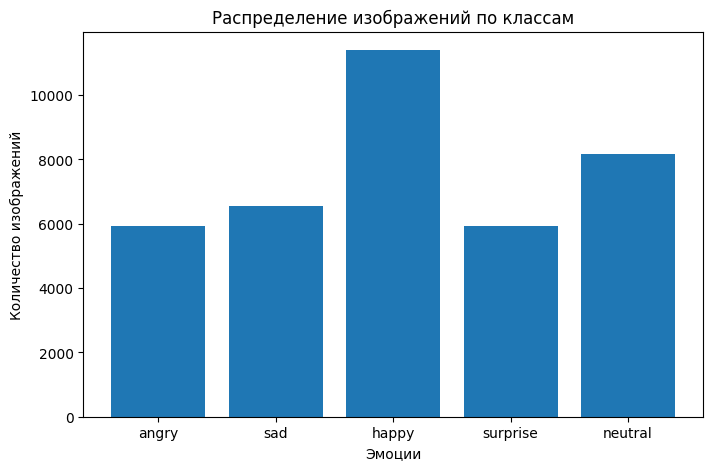

In [7]:
plt.figure(figsize=(8,5))
plt.bar(class_counts.keys(), class_counts.values())
plt.title("Распределение изображений по классам")
plt.xlabel("Эмоции")
plt.ylabel("Количество изображений")
plt.show()


Просмотрим несколько примеров из каждого класса

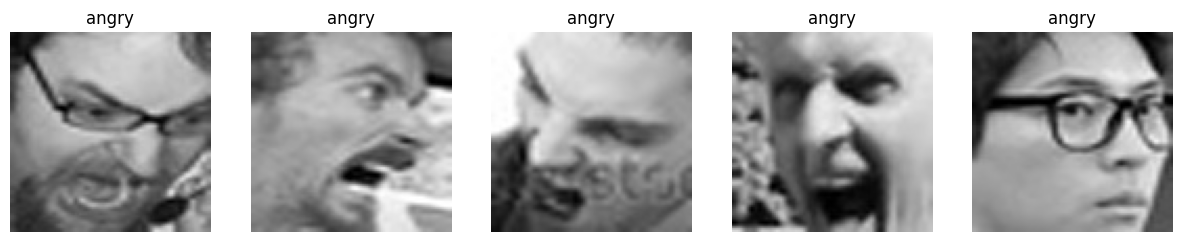

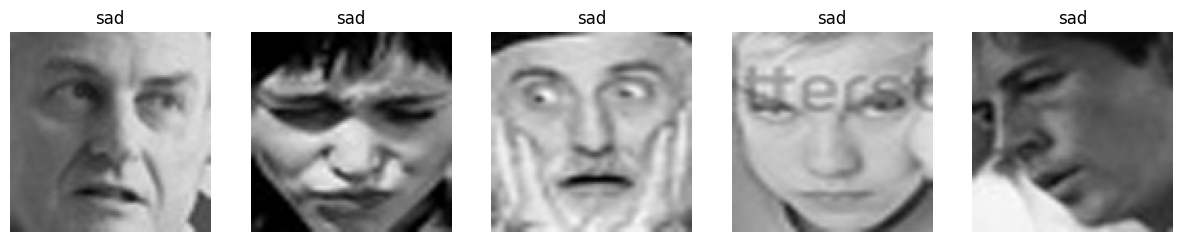

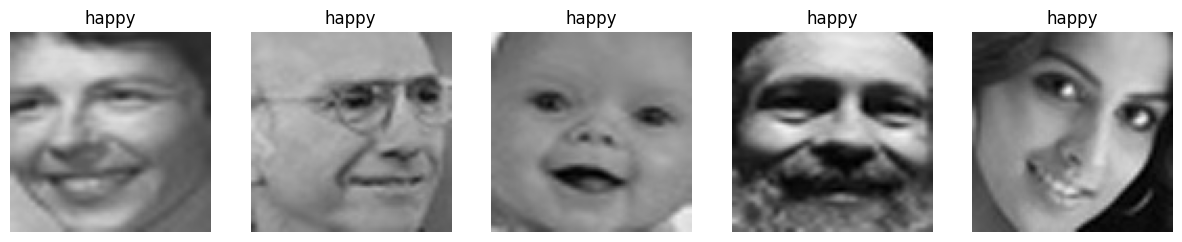

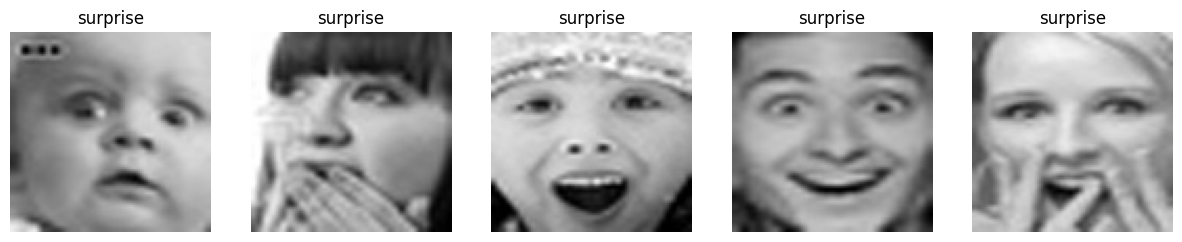

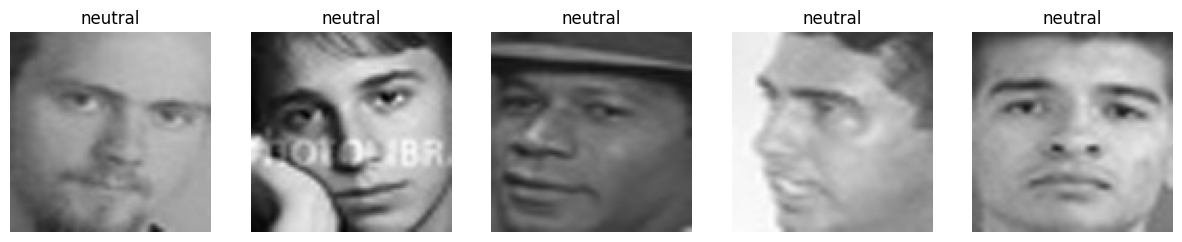

In [8]:
def show_examples(class_name, n=5):
    class_path = DATA_PATH / class_name
    images = list(class_path.glob("*"))
    images = images[:n]

    plt.figure(figsize=(15,3))

    for i, img_path in enumerate(images):
        img = Image.open(img_path)
        plt.subplot(1, n, i+1)
        plt.imshow(img, cmap="gray")
        plt.axis("off")
        plt.title(class_name)

    plt.show()


for cls in TARGET_CLASSES:
    show_examples(cls, n=5)


Анализ примеров изображений показывает, что снимки представляют собой уже обрезанные и центрированные лица, пригодные для последующего обучения модели. Изображения имеют различное разрешение и варьируются по освещению, ракурсу и выраженности эмоций, что положительно влияет на способность модели к обобщению.

На данном этапе датасет можно считать качественным и подходящим для решения задачи классификации эмоций.

### Шаг 3. Подготовка данных

Для обучения нейронной сети необходимо привести изображения к единому формату и разделить набор данных на обучающую, проверочную и тестовую выборки. В рамках данной работы выполним следующие шаги:

- выбор фиксированного размера изображения (высота и ширина);
- формирование списка путей ко всем изображениям и соответствующих меток классов;
- разбиение датасета на три части: обучающую (train), проверочную (validation) и тестовую (test) выборки с сохранением пропорций классов (стратификация);
- настройка пайплайна "tf.data" для автоматической загрузки изображений, изменения размера и нормализации пикселей.

Это позволяет упростить последующее обучение сверточной нейронной сети и обеспечить корректное сравнение результатов на разных подвыборках.



In [9]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

IMG_HEIGHT = 96
IMG_WIDTH = 96
IMG_CHANNELS = 3

BATCH_SIZE = 32
RANDOM_STATE = 42

IMG_HEIGHT, IMG_WIDTH, BATCH_SIZE


(96, 96, 32)

Проверяем, что количество путей совпадает с суммой по class_counts (должно быть близко или равно).

In [10]:
image_paths = []
labels = []

for cls in TARGET_CLASSES:
    class_dir = DATA_PATH / cls
    for ext in ("*.jpg", "*.jpeg", "*.png"):
        for img_path in class_dir.glob(ext):
            image_paths.append(str(img_path))
            labels.append(cls)

len(image_paths), len(labels)


(37939, 37939)

Кодируем метки в числа

In [11]:

class_to_idx = {cls: idx for idx, cls in enumerate(TARGET_CLASSES)}
idx_to_class = {idx: cls for cls, idx in class_to_idx.items()}

class_to_idx


{'angry': 0, 'sad': 1, 'happy': 2, 'surprise': 3, 'neutral': 4}

Теперь закодируем labels

In [12]:
y = np.array([class_to_idx[lbl] for lbl in labels])
X = np.array(image_paths)

X.shape, y.shape


((37939,), (37939,))

Разобьем на train / val / test (70 / 15 / 15)

Сначала отделим 30% под val+test, затем пополам разобьём их на val и test.

In [13]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X,
    y,
    test_size=0.30,
    stratify=y,
    random_state=RANDOM_STATE
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.50,
    stratify=y_temp,
    random_state=RANDOM_STATE
)

len(X_train), len(X_val), len(X_test)


(26557, 5691, 5691)

Проверим распределение классов в каждой выборке

In [14]:
def count_by_class(labels_array):
    unique, counts = np.unique(labels_array, return_counts=True)
    return {idx_to_class[u]: c for u, c in zip(unique, counts)}

train_counts = count_by_class(y_train)
val_counts = count_by_class(y_val)
test_counts = count_by_class(y_test)

train_counts, val_counts, test_counts


({'angry': np.int64(4144),
  'sad': np.int64(4574),
  'happy': np.int64(7979),
  'surprise': np.int64(4144),
  'neutral': np.int64(5716)},
 {'angry': np.int64(888),
  'sad': np.int64(980),
  'happy': np.int64(1710),
  'surprise': np.int64(888),
  'neutral': np.int64(1225)},
 {'angry': np.int64(888),
  'sad': np.int64(981),
  'happy': np.int64(1709),
  'surprise': np.int64(888),
  'neutral': np.int64(1225)})

Визуализируем

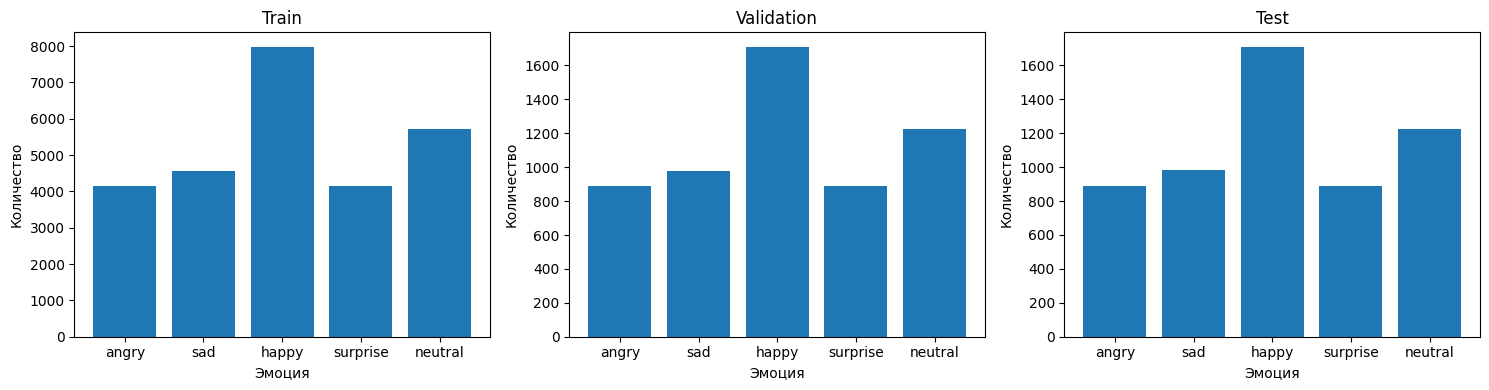

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, counts, title in zip(
    axes,
    [train_counts, val_counts, test_counts],
    ["Train", "Validation", "Test"]
):
    ax.bar(counts.keys(), counts.values())
    ax.set_title(title)
    ax.set_xlabel("Эмоция")
    ax.set_ylabel("Количество")

plt.tight_layout()
plt.show()


Разбиение данных на выборки

Данные были разделены на три подвыборки в пропорции 70/15/15:

- обучающая выборка (train) используется для подбора параметров модели;
- проверочная выборка (validation) применяется для подбора гиперпараметров и контроля переобучения;
- тестовая выборка (test) предназначена для финальной оценки качества модели.

Разбиение выполнено с сохранением пропорций классов (стратификация), что позволяет избежать смещения распределения эмоций между выборками и обеспечить корректность сравнения результатов.

Создадим функцию для предобработки изображения (resize + нормализация), которая:
- загружает файл по пути,
- декодирует изображение,
- приводим к RGB,
- изменяет размер на IMG_HEIGHT x IMG_WIDTH,
- нормализует пиксели в диапазон [0, 1].

In [16]:
def preprocess_image(path, label):
    image_bytes = tf.io.read_file(path)

    image = tf.io.decode_image(
        image_bytes,
        channels=IMG_CHANNELS,
        expand_animations=False
    )

    image.set_shape((None, None, IMG_CHANNELS))

    image = tf.image.convert_image_dtype(image, tf.float32)

    image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH])

    return image, label


Проверим на одном примере:

In [17]:
sample_img, sample_label = preprocess_image(X_train[0], y_train[0])

sample_img.shape, sample_label


(TensorShape([96, 96, 3]), np.int64(3))

Создадим tf.data-пайплайна для train / val / test

In [18]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val))
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))

train_ds = (train_ds
            .map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
            .shuffle(buffer_size=len(X_train))
            .batch(BATCH_SIZE)
            .prefetch(tf.data.AUTOTUNE)
           )

val_ds = (val_ds
          .map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
          .batch(BATCH_SIZE)
          .prefetch(tf.data.AUTOTUNE)
         )

test_ds = (test_ds
           .map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
           .batch(BATCH_SIZE)
           .prefetch(tf.data.AUTOTUNE)
          )


Проверим на одной batch

In [19]:
for images_batch, labels_batch in train_ds.take(1):
    print("Форма батча изображений:", images_batch.shape)
    print("Форма батча меток:", labels_batch.shape)


Форма батча изображений: (32, 96, 96, 3)
Форма батча меток: (32,)


И визуализируем несколько картинок из batch

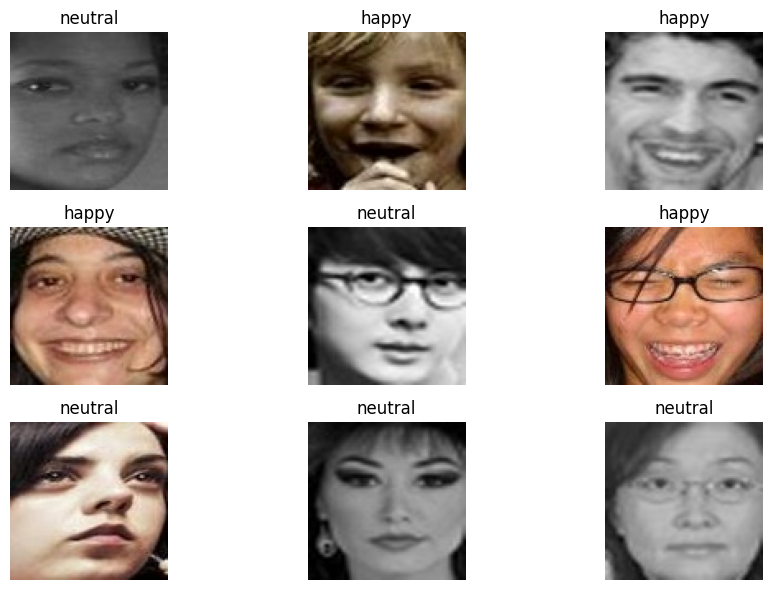

In [20]:
plt.figure(figsize=(10, 6))

for i in range(9):
    plt.subplot(3, 3, i+1)
    img = images_batch[i].numpy()
    lbl_idx = labels_batch[i].numpy()
    lbl_name = idx_to_class[int(lbl_idx)]
    
    plt.imshow(img)
    plt.title(lbl_name)
    plt.axis("off")

plt.tight_layout()
plt.show()


#### Итоги подготовки данных
В результате подготовки данных:

- все изображения приведены к единому размеру 96×96 пикселей с тремя цветовыми каналами (RGB);
- пиксельные значения нормализованы в диапазон [0, 1];
- датасет разделён на обучающую, проверочную и тестовую выборки с сохранением распределения классов;
- настроен пайплайн "tf.data", обеспечивающий автоматическую загрузку, предобработку и пакетирование данных.

Полученный набор данных готов к использованию для обучения сверточной нейронной сети.
### Шаг 4. Построение и обучение базовой сверточной нейронной сети

Для решения задачи многоклассовой классификации эмоций по изображениям лица в данной работе используем сверточная нейронная сеть (Convolutional Neural Network, CNN). Данный тип архитектуры хорошо подходит для обработки изображений, так как позволяет автоматически извлекать локальные пространственные признаки (края, текстуры, характерные формы) и постепенно формировать более сложные представления.

Базовая модель включает следующие типы слоёв:
- сверточные слои (Conv2D) с нелинейностью ReLU;
- слои подвыборки (MaxPooling2D) для уменьшения пространственных размеров признаков;
- слой Dropout для снижения переобучения;
- полносвязные слои (Dense) для окончательной классификации;
- выходной слой с функцией softmax для предсказания вероятностей пяти классов эмоций.

В качестве функции потерь используется **sparse_categorical_crossentropy**, так как целевые метки представлены целыми числами (индексами классов). В качестве оптимизатора применяется **Adam**. Качество модели оценивается по метрике **accuracy** на обучающей, проверочной и тестовой выборках.

Построим модель

In [21]:
from tensorflow import keras
from tensorflow.keras import layers

NUM_CLASSES = len(TARGET_CLASSES)

model = keras.Sequential([
    layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
    
    layers.Conv2D(32, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(128, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    
    layers.Dense(NUM_CLASSES, activation="softmax")
])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 96, 96, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,453,317 (9.36 MB)

 Trainable params: 2,453,317 (9.36 MB)

 Non-trainable params: 0 (0.00 B)

Запись model.summary() всегда выводит:
* какие слои входят в модель;
* какие у них выходные формы (Output Shape);
* сколько trainable параметров;
* общий размер модели

Компиляция и обучение модели

Сделаем обучение с EarlyStopping, чтобы модель не переобучалась и чтобы не гонять лишние эпохи.

In [22]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=5,
        restore_best_weights=True
    )
]



In [23]:
EPOCHS = 10

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/10
830/830 ━━━━━━━━━━━━━━━━━━━━ 121s 136ms/step - accuracy: 0.4749 - loss: 1.2523 - val_accuracy: 0.5802 - val_loss: 1.0316
Epoch 2/10
830/830 ━━━━━━━━━━━━━━━━━━━━ 103s 117ms/step - accuracy: 0.6087 - loss: 0.9789 - val_accuracy: 0.6408 - val_loss: 0.9121
Epoch 3/10
830/830 ━━━━━━━━━━━━━━━━━━━━ 104s 118ms/step - accuracy: 0.6528 - loss: 0.8647 - val_accuracy: 0.6549 - val_loss: 0.8607
Epoch 4/10
830/830 ━━━━━━━━━━━━━━━━━━━━ 105s 119ms/step - accuracy: 0.6918 - loss: 0.7707 - val_accuracy: 0.6607 - val_loss: 0.8676
Epoch 5/10
830/830 ━━━━━━━━━━━━━━━━━━━━ 106s 119ms/step - accuracy: 0.7211 - loss: 0.6973 - val_accuracy: 0.6860 - val_loss: 0.8232
Epoch 6/10
830/830 ━━━━━━━━━━━━━━━━━━━━ 229s 268ms/step - accuracy: 0.7595 - loss: 0.6111 - val_accuracy: 0.6834 - val_loss: 0.8940
Epoch 7/10
830/830 ━━━━━━━━━━━━━━━━━━━━ 109s 122ms/step - accuracy: 0.7820 - loss: 0.5454 - val_accuracy: 0.6767 - val_loss: 0.9445
Epoch 8/10
830/830 ━━━━━━━━━━━━━━━━━━━━ 111s 123ms/step - accuracy: 0.8083 -

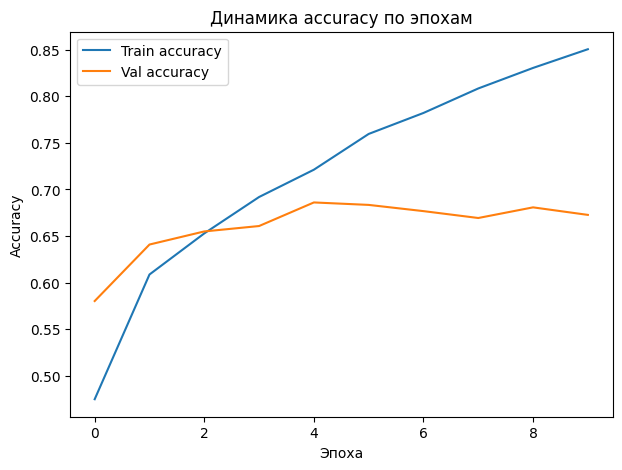

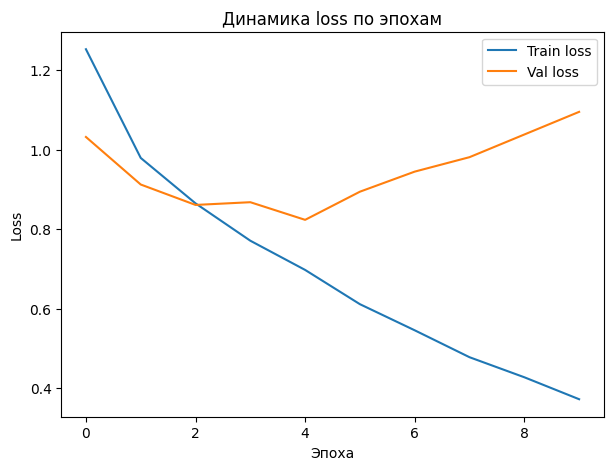

In [24]:
history_dict = history.history

plt.figure(figsize=(7,5))
plt.plot(history_dict["accuracy"], label="Train accuracy")
plt.plot(history_dict["val_accuracy"], label="Val accuracy")
plt.title("Динамика accuracy по эпохам")
plt.xlabel("Эпоха")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(history_dict["loss"], label="Train loss")
plt.plot(history_dict["val_loss"], label="Val loss")
plt.title("Динамика loss по эпохам")
plt.xlabel("Эпоха")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [26]:
test_loss, test_acc = model.evaluate(test_ds, verbose=0)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)


Test loss: 0.8663825392723083
Test accuracy: 0.6837111115455627


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_true = []
y_pred = []

for images_batch, labels_batch in test_ds:
    preds = model.predict(images_batch, verbose=0)
    pred_classes = np.argmax(preds, axis=1)
    
    y_true.extend(labels_batch.numpy())
    y_pred.extend(pred_classes)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

cm = confusion_matrix(y_true, y_pred)
cm


array([[ 477,  122,   65,   97,  127],
       [ 123,  467,   73,   30,  288],
       [  46,   63, 1450,   54,   96],
       [  38,   27,   44,  721,   58],
       [  79,  198,  117,   55,  776]])

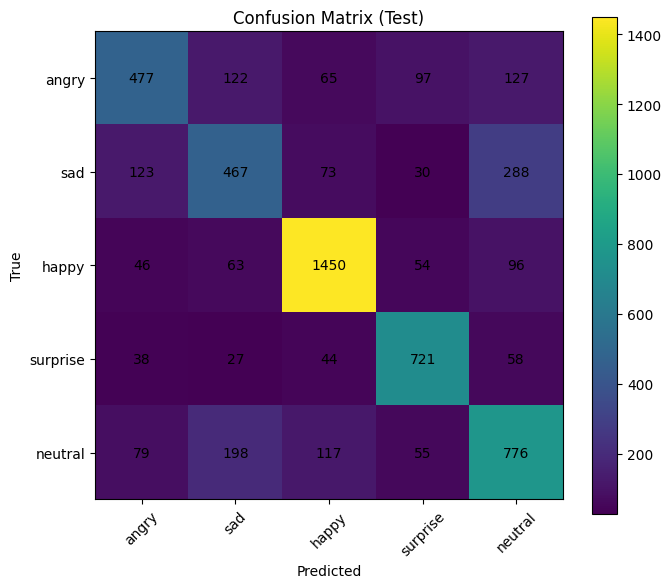

In [ ]:
plt.figure(figsize=(7,6))
plt.imshow(cm)
plt.title("Confusion Matrix (Test)")
plt.xticks(range(NUM_CLASSES), TARGET_CLASSES, rotation=45)
plt.yticks(range(NUM_CLASSES), TARGET_CLASSES)
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("True")

for i in range(NUM_CLASSES):
    for j in range(NUM_CLASSES):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.tight_layout()
plt.show()


In [29]:
print(classification_report(
    y_true, 
    y_pred, 
    target_names=TARGET_CLASSES
))


              precision    recall  f1-score   support

       angry       0.63      0.54      0.58       888
         sad       0.53      0.48      0.50       981
       happy       0.83      0.85      0.84      1709
    surprise       0.75      0.81      0.78       888
     neutral       0.58      0.63      0.60      1225

    accuracy                           0.68      5691
   macro avg       0.66      0.66      0.66      5691
weighted avg       0.68      0.68      0.68      5691



### 5. Улучшение модели классификации эмоций

Для повышения качества классификации были применены следующие методы:

- аугментация изображений для увеличения разнообразия обучающих данных;
- учет дисбаланса классов с помощью весов классов;
- улучшение архитектуры сверточной нейронной сети за счёт Batch Normalization и дополнительной регуляризации.

Цель данного этапа - повысить обобщающую способность модели и улучшить качество распознавания сложных эмоций.


In [37]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
])

augmented_model = keras.Sequential([
    layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
    
    data_augmentation,
    
    layers.Conv2D(32, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(128, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.4),
    
    layers.Dense(NUM_CLASSES, activation="softmax")
])

augmented_model.summary()


augmented_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=5e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history_aug = augmented_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=callbacks,
    verbose=1
)



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)       │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 96, 96, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 48, 48, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,453,317 (9.36 MB)

 Trainable params: 2,453,317 (9.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
830/830 ━━━━━━━━━━━━━━━━━━━━ 119s 132ms/step - accuracy: 0.4255 - loss: 1.3667 - val_accuracy: 0.5405 - val_loss: 1.1359
Epoch 2/20
830/830 ━━━━━━━━━━━━━━━━━━━━ 121s 135ms/step - accuracy: 0.5405 - loss: 1.1322 - val_accuracy: 0.6117 - val_loss: 0.9641
Epoch 3/20
830/830 ━━━━━━━━━━━━━━━━━━━━ 121s 135ms/step - accuracy: 0.5885 - loss: 1.0310 - val_accuracy: 0.6470 - val_loss: 0.8965
Epoch 4/20
830/830 ━━━━━━━━━━━━━━━━━━━━ 123s 137ms/step - accuracy: 0.6097 - loss: 0.9667 - val_accuracy: 0.6596 - val_loss: 0.8476
Epoch 5/20
830/830 ━━━━━━━━━━━━━━━━━━━━ 123s 137ms/step - accuracy: 0.6350 - loss: 0.9160 - val_accuracy: 0.6686 - val_loss: 0.8330


In [38]:
test_loss_aug, test_acc_aug = augmented_model.evaluate(test_ds, verbose=0)
print("Improved (Aug) Test loss:", test_loss_aug)
print("Improved (Aug) Test accuracy:", test_acc_aug)


Improved (Aug) Test loss: 1.1299769878387451
Improved (Aug) Test accuracy: 0.5531541109085083


In [39]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_true_aug = []
y_pred_aug = []

for images_batch, labels_batch in test_ds:
    preds = augmented_model.predict(images_batch, verbose=0)
    pred_classes = np.argmax(preds, axis=1)
    
    y_true_aug.extend(labels_batch.numpy())
    y_pred_aug.extend(pred_classes)

y_true_aug = np.array(y_true_aug)
y_pred_aug = np.array(y_pred_aug)

cm_aug = confusion_matrix(y_true_aug, y_pred_aug)
cm_aug


array([[ 387,   55,   79,  176,  191],
       [ 185,  174,  111,  148,  363],
       [ 106,  105, 1222,  110,  166],
       [  55,   27,   53,  650,  103],
       [ 162,  100,  125,  123,  715]])

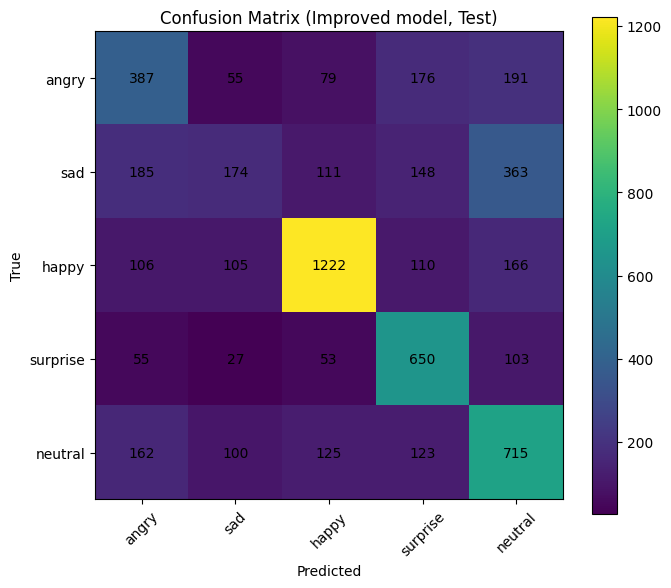

In [40]:
plt.figure(figsize=(7,6))
plt.imshow(cm_aug)
plt.title("Confusion Matrix (Improved model, Test)")
plt.xticks(range(NUM_CLASSES), TARGET_CLASSES, rotation=45)
plt.yticks(range(NUM_CLASSES), TARGET_CLASSES)
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("True")

for i in range(NUM_CLASSES):
    for j in range(NUM_CLASSES):
        plt.text(j, i, cm_aug[i, j], ha="center", va="center")

plt.tight_layout()
plt.show()


In [41]:
print(classification_report(
    y_true_aug, 
    y_pred_aug, 
    target_names=TARGET_CLASSES
))


              precision    recall  f1-score   support

       angry       0.43      0.44      0.43       888
         sad       0.38      0.18      0.24       981
       happy       0.77      0.72      0.74      1709
    surprise       0.54      0.73      0.62       888
     neutral       0.46      0.58      0.52      1225

    accuracy                           0.55      5691
   macro avg       0.52      0.53      0.51      5691
weighted avg       0.55      0.55      0.54      5691



In [42]:
import pandas as pd

comparison_df = pd.DataFrame({
    "Модель": ["Базовая CNN", "CNN + Augmentation"],
    "Test accuracy": [test_acc, test_acc_aug],
    "Test loss": [test_loss, test_loss_aug]
})

comparison_df


,Модель,Test accuracy,Test loss
0,Базовая CNN,0.683711,0.866383
1,CNN + Augmentation,0.553154,1.129977


### 6. Демонстрация работы модели

На данном этапе демонстрируется работа обученной модели на отдельных изображениях.  
Демонстрация включает:

- загрузку изображения;
- выполнение той же предобработки, что и при обучении (resize, нормализация);
- получение вероятностей классов и финального предсказания эмоции;
- визуальный вывод результата (эмоция + вероятности).

Цель демонстрации - показать практическую применимость разработанной модели и корректность полного пайплайна: изображение → предобработка → классификация.


In [ ]:

DEMO_MODEL = model  



In [ ]:
import numpy as np
from PIL import Image

def predict_emotion_from_path(img_path, model_to_use):
    img = Image.open(img_path).convert("RGB")
    
    img_resized = img.resize((IMG_WIDTH, IMG_HEIGHT))
    
    x = np.array(img_resized).astype("float32") / 255.0
    
    x = np.expand_dims(x, axis=0) 
    
    probs = model_to_use.predict(x, verbose=0)[0]
    pred_idx = int(np.argmax(probs))
    pred_label = idx_to_class[pred_idx]
    
    plt.figure(figsize=(4,4))
    plt.imshow(img_resized)
    plt.axis("off")
    plt.title(f"Predicted emotion: {pred_label}")
    plt.show()
    
    top = sorted([(idx_to_class[i], float(probs[i])) for i in range(len(probs))],
                 key=lambda t: t[1], reverse=True)
    
    return pred_label, top


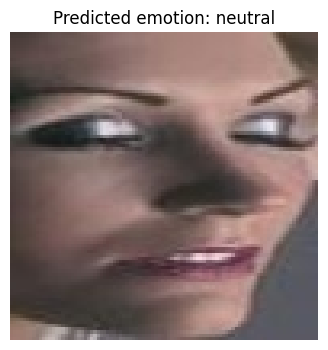

True label: neutral
Top probabilities:
  neutral   -> 0.694
  happy     -> 0.180
  sad       -> 0.107
  angry     -> 0.015
  surprise  -> 0.004
----------------------------------------


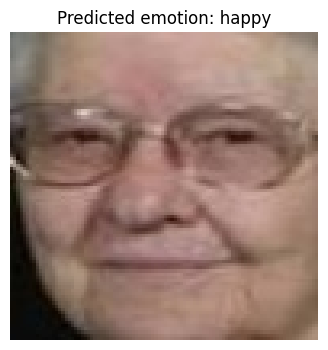

True label: happy
Top probabilities:
  happy     -> 0.993
  neutral   -> 0.006
  sad       -> 0.000
  angry     -> 0.000
  surprise  -> 0.000
----------------------------------------


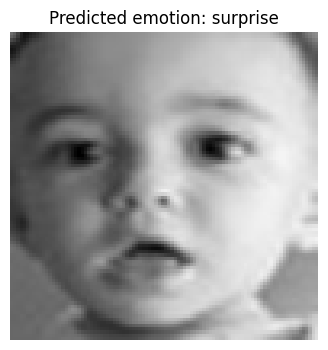

True label: surprise
Top probabilities:
  surprise  -> 0.785
  neutral   -> 0.186
  sad       -> 0.020
  happy     -> 0.005
  angry     -> 0.003
----------------------------------------


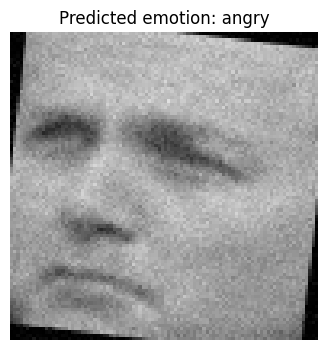

True label: angry
Top probabilities:
  angry     -> 0.910
  surprise  -> 0.090
  sad       -> 0.000
  neutral   -> 0.000
  happy     -> 0.000
----------------------------------------


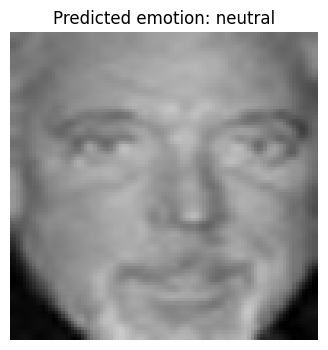

True label: neutral
Top probabilities:
  neutral   -> 0.361
  happy     -> 0.323
  angry     -> 0.195
  sad       -> 0.102
  surprise  -> 0.019
----------------------------------------


In [54]:
import random

sample_indices = random.sample(range(len(X_test)), 5)

for idx in sample_indices:
    img_path = X_test[idx]
    true_label = idx_to_class[int(y_test[idx])]
    
    pred_label, top = predict_emotion_from_path(img_path, DEMO_MODEL)
    
    print("True label:", true_label)
    print("Top probabilities:")
    for name, p in top:
        print(f"  {name:9s} -> {p:.3f}")
    print("-" * 40)


In [50]:

model.save("emotion_model.keras")

import tensorflow as tf
model = tf.keras.models.load_model("emotion_model.keras")


c:\Users\klass\OneDrive\Рабочий стол\ml\venv\lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Создаем приложение с возможностью делать фотографии или загружать их (app.py)
Подключаем модель 

Тестирование приложения:
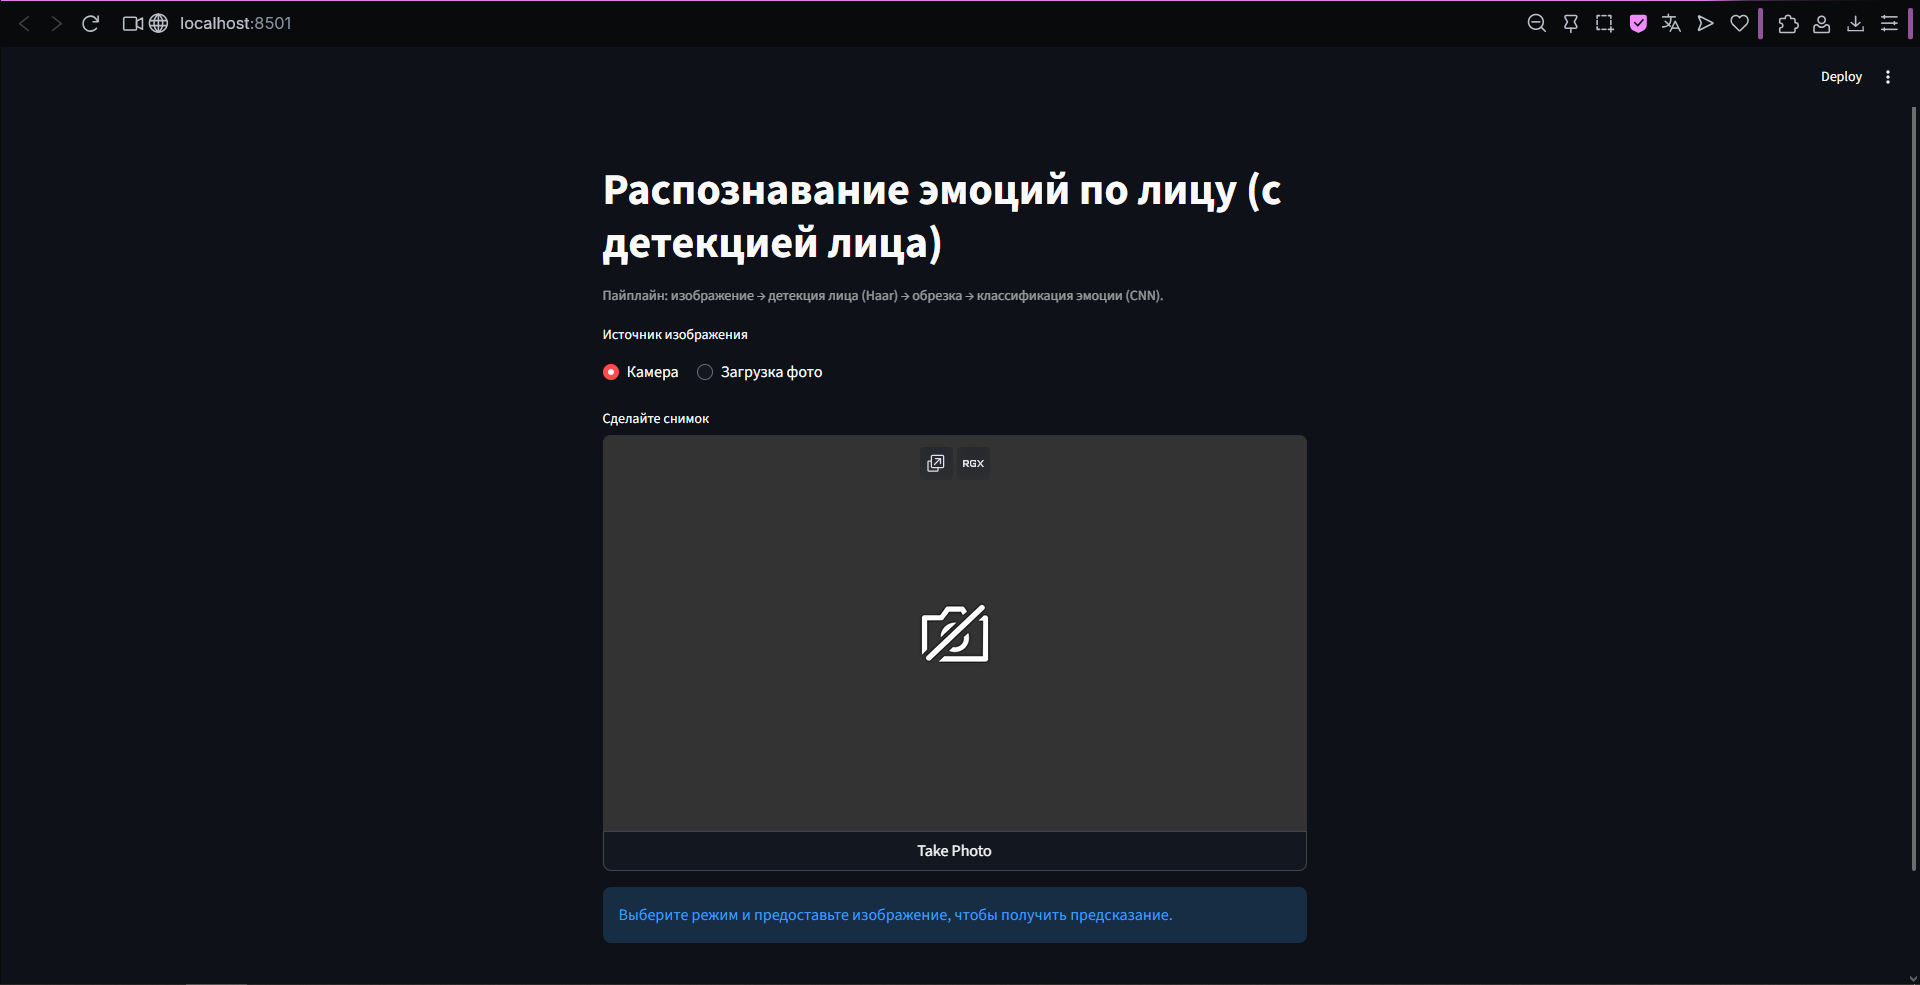
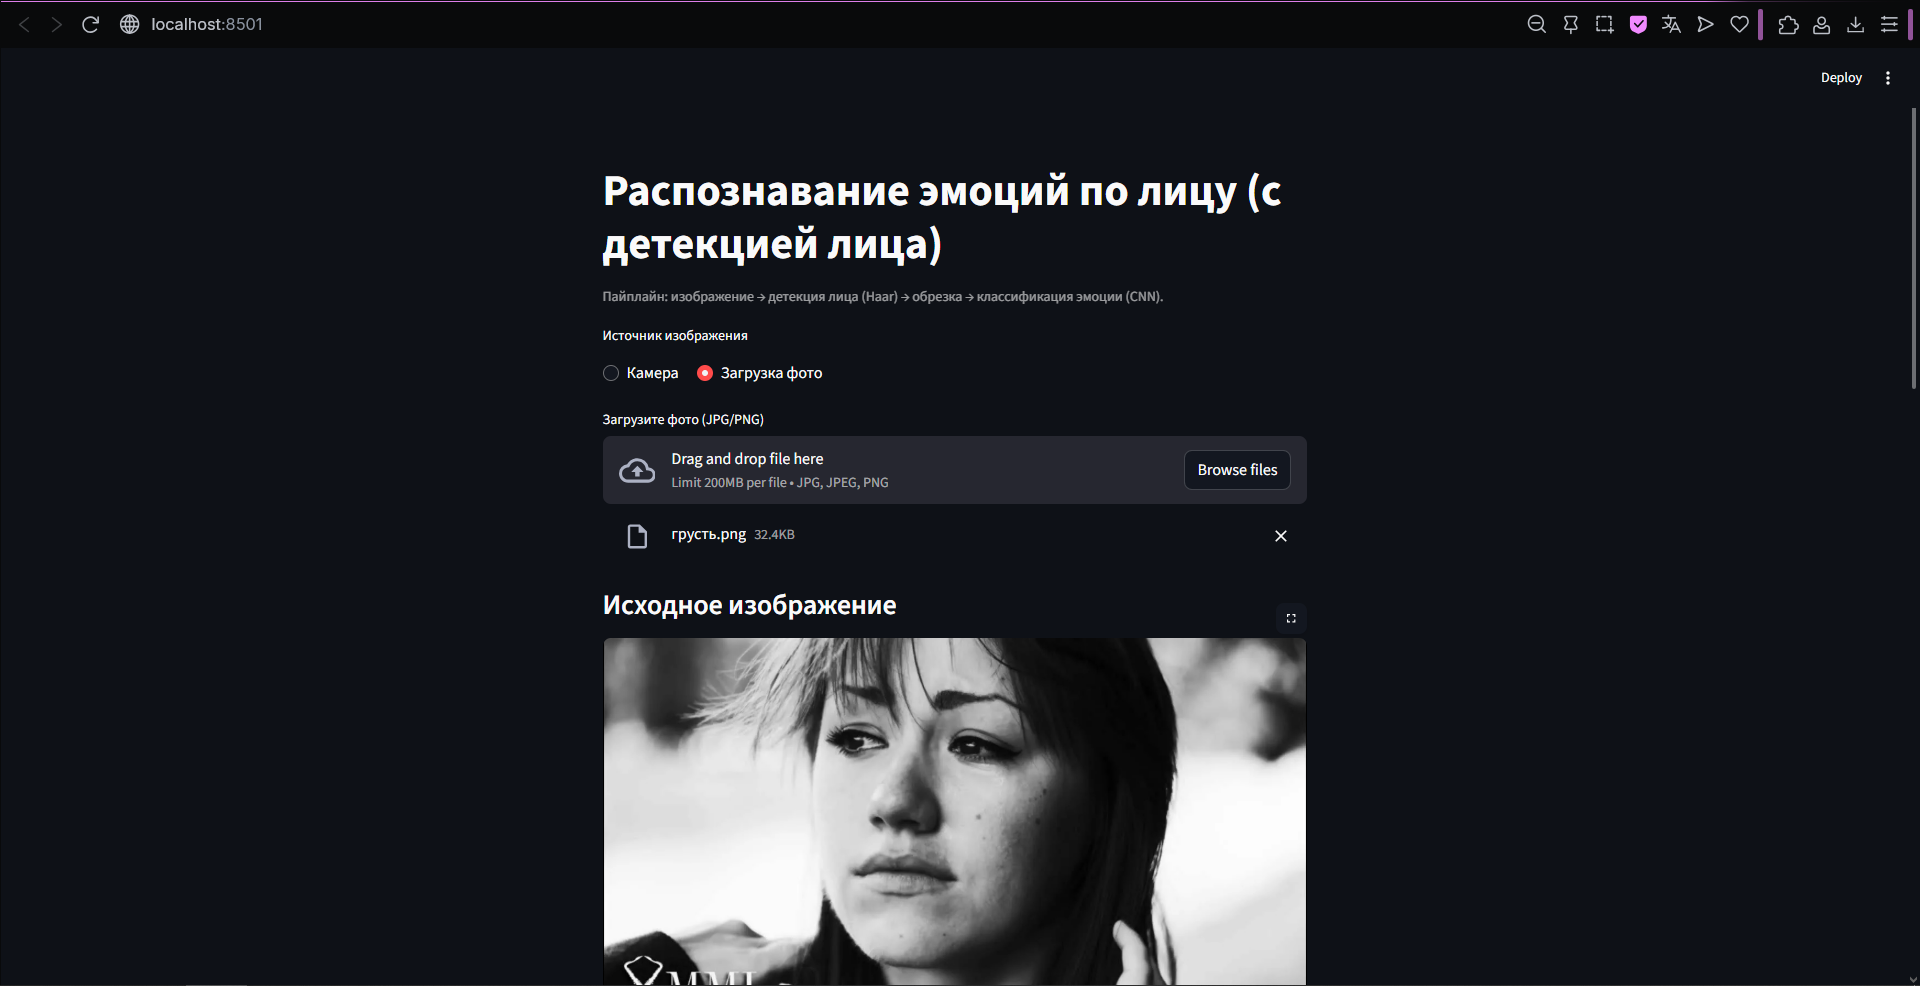
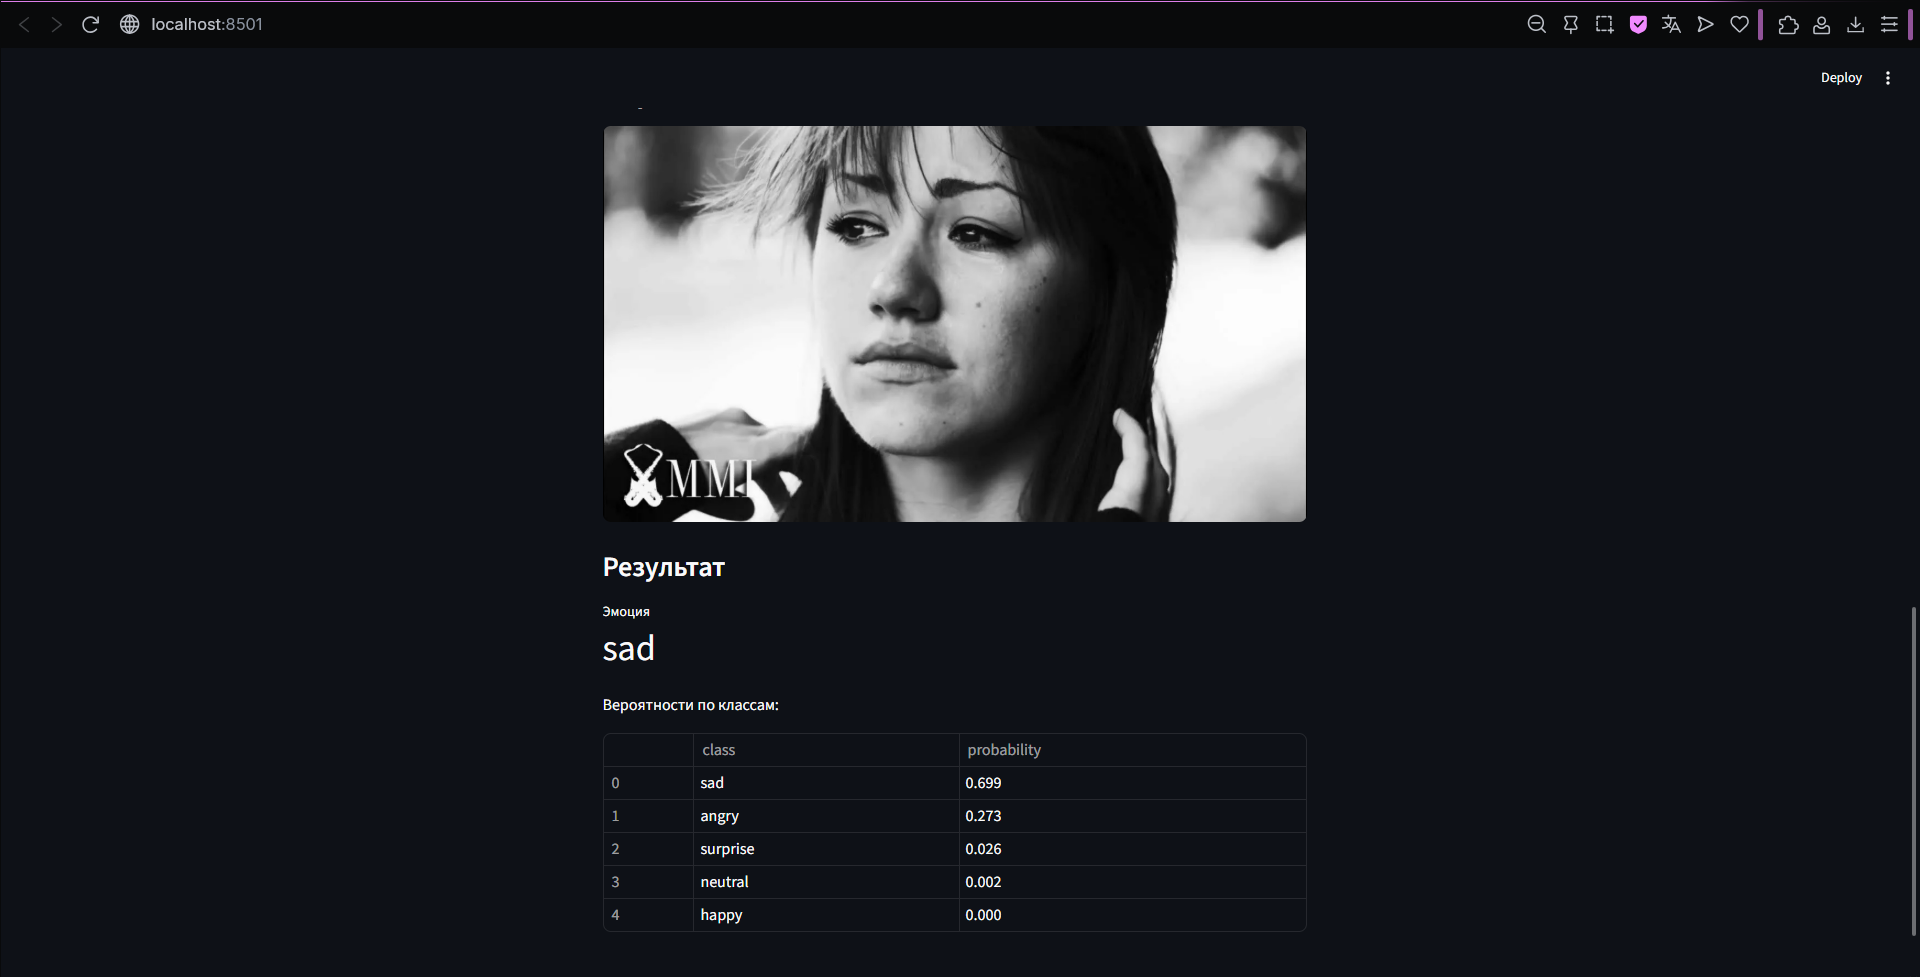